About this file
This dataset provides detailed information on global fossil CO2 emissions by country until 2022

The data is organized using the following columns: Country (the name of the country), ISO 3166-1 alpha-3 (the three letter code for the country), Year (the year of survey data), Total (the total amount of CO2 emitted by the country in that year), Coal (amount of CO2 emitted by coal in that year), Oil (amount emitted by oil) , Gas (amount emitted by gas) , Cement( amount emitted by cement) , Flaring(flaring emission levels ) and Other( other forms such as industrial processes ). In addition there is also one extra column Per Capita which provides an insight into how much personal carbon dioxide emission is present in each Country per individual.
CO2 Emission is measured in Million Tons per Year

In [1]:
import os     
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
##Dataset from: https://www.kaggle.com/datasets/thedevastator/global-fossil-co2-emissions-by-country-2002-2022?datasetId=2779281&language=Python
##Original https://zenodo.org/record/7215364#.Y_0ISD3MJD9


MtCO2 = pd.read_csv('GCB2022v27_MtCO2_flat.csv')

In [3]:
MtCO2.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
MtCO2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             63104 non-null  object 
 1   ISO 3166-1 alpha-3  61472 non-null  object 
 2   Year                63104 non-null  int64  
 3   Total               62904 non-null  float64
 4   Coal                21744 non-null  float64
 5   Oil                 21717 non-null  float64
 6   Gas                 21618 non-null  float64
 7   Cement              20814 non-null  float64
 8   Flaring             21550 non-null  float64
 9   Other               1620 non-null   float64
 10  Per Capita          18974 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.3+ MB


In [5]:
MtCO2.describe()

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
count,63104.000000,62904.000000,21744.000000,21717.000000,21618.000000,20814.000000,21550.000000,1620.000000,18974.000000
mean,1885.500000,55.224788,73.968916,55.760624,23.504285,4.330443,1.712695,10.951389,4.413363
std,78.519728,824.845435,598.986992,519.034563,247.674772,50.305770,16.727067,39.034073,17.432815
min,1750.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1817.750000,0.000000,0.000000,0.091600,0.000000,0.000000,0.000000,0.520885,0.197866
50%,1885.500000,0.000000,0.271852,1.044240,0.000000,0.022756,0.000000,1.255329,1.303949
75%,1953.250000,0.549342,6.736411,8.339752,0.581628,0.568502,0.000000,4.385471,5.077994
max,2021.000000,37123.850352,15051.512770,12345.653374,7921.829472,1672.592372,439.253991,306.638573,834.192642


In [6]:
MtCO2.isnull().sum().sort_values()

Country                   0
Year                      0
Total                   200
ISO 3166-1 alpha-3     1632
Coal                  41360
Oil                   41387
Gas                   41486
Flaring               41554
Cement                42290
Per Capita            44130
Other                 61484
dtype: int64

In [7]:
#Check for duplicate rows

duplicate_check = MtCO2.duplicated(keep=False).sum()
print(duplicate_check)

0


In [8]:
# Check how many countries

len(MtCO2['Country'].unique())

232

In [9]:
# Drop columns: 'ISO 3166-1 alpha-3', 'Per Capita','Other'
MtCO2_analysis = MtCO2.drop(['ISO 3166-1 alpha-3','Per Capita','Other'], axis=1)



In [10]:
#Find the first row for each country that doesnt have all NaN 


# Group by country and apply a custom function to each group
def first_year_with_no_nans(group):
    # Count the number of NaN values in each row
    nans = group.isna().sum(axis=1)
    
    # Return the first year where there are no more than 6 NaN values
    few_nans = group[nans <= 1]
    return few_nans['Year'].iloc[0] if not few_nans.empty else None

first_year = MtCO2_analysis.groupby('Country').apply(first_year_with_no_nans)

# Drop all rows for each country that come before the first year
MtCO2_analysis = MtCO2_analysis.loc[MtCO2_analysis.apply(lambda row: row['Year'] >= first_year[row['Country']], axis=1)]





In [11]:
MtCO2_analysis

,Country,Year,Total,Coal,Oil,Gas,Cement,Flaring
199,Afghanistan,1949,0.014656,0.014656,0.000000,0.000000,0.000000,0.000000
200,Afghanistan,1950,0.084272,0.021068,0.063204,0.000000,0.000000,0.000000
201,Afghanistan,1951,0.091600,0.025648,0.065952,0.000000,0.000000,0.000000
202,Afghanistan,1952,0.091600,0.031708,0.059892,0.000000,0.000000,0.000000
203,Afghanistan,1953,0.106256,0.037949,0.068307,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
63099,Global,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176
63100,Global,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746
63101,Global,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991
63102,Global,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673


In [12]:
MtCO2_analysis.fillna(0, inplace=True)

In [13]:
#Make all column names lowercase and replace spaces with _

MtCO2_analysis.columns = MtCO2_analysis.columns.str.lower().str.replace(' ', '_')

In [14]:

#TOP 10 COAL CONSUMERS IN THE LAST 20 YEARS

# Filter the data to only include the last 20 years
current_year = pd.Timestamp('now').year
df = MtCO2_analysis[MtCO2_analysis['year'] >= current_year - 20]

# Group by country and sum the coal emissions
coal_emissions_by_country = MtCO2_analysis.groupby('country')['coal'].sum()

# Get the top 10 countries of coal emissions
top_10_countries = coal_emissions_by_country.nlargest(10)

# Show the result
print(top_10_countries)

country
Global            784808.424702
China             187073.411887
USA               175444.989793
Germany            64665.842957
United Kingdom     56850.597464
Russia             45571.473160
India              37018.082763
Japan              24175.925122
Poland             23198.407184
France             19078.952503
Name: coal, dtype: float64


_Learned that in the country column we have a "Global" value, we don't want it to disturbe our analysis_

In [15]:
#save the df with Global country
MtCO2_analysis_with_global = MtCO2_analysis

MtCO2_analysis = MtCO2_analysis[MtCO2_analysis['country'] != 'Global']

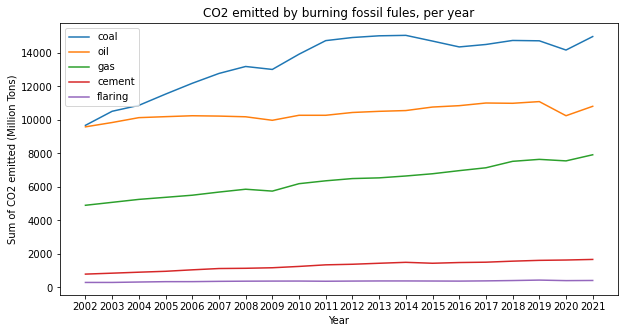

In [16]:
# calculate the sum of each column by year
MtCO2_analysis_filtered = MtCO2_analysis[MtCO2_analysis['year'] >= 2002]
MtCO2_analysis_sum = MtCO2_analysis_filtered.groupby(['year']).sum()
MtCO2_analysis_sum.drop(["total"], axis=1, inplace=True)
# plot the sum of each column
MtCO2_analysis_sum.plot(kind='line', figsize=(10, 5))

# set the x and y labels
plt.xlabel('Year')
plt.ylabel('Sum of CO2 emitted (Million Tons)')
plt.xticks(range(2002, 2022))
# add a title to the plot
plt.title('CO2 emitted by burning fossil fules, per year')

# show the plot
plt.show()





In [17]:
#RE-CHECK - #TOP 10 COAL CONSUMERS IN THE LAST 20 YEARS

# Filter the data to only include the last 20 years
current_year = pd.Timestamp('now').year
df = MtCO2_analysis[MtCO2_analysis['year'] >= current_year - 20]

# Group by country and sum the coal emissions
coal_emissions_by_country = MtCO2_analysis.groupby('country')['coal'].sum()

# Get the top 10 countries of coal emissions
top_10_countries = coal_emissions_by_country.nlargest(10)

# Show the result
print(top_10_countries)

country
China             187073.411887
USA               175444.989793
Germany            64665.842957
United Kingdom     56850.597464
Russia             45571.473160
India              37018.082763
Japan              24175.925122
Poland             23198.407184
France             19078.952503
South Africa       18534.971906
Name: coal, dtype: float64


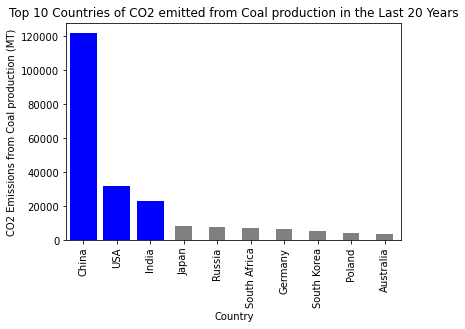

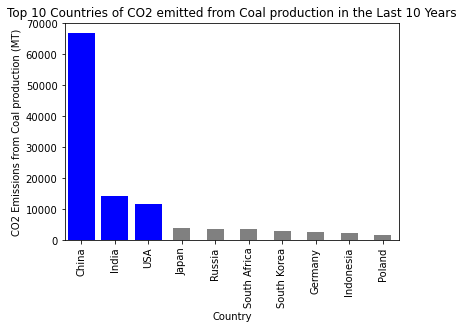

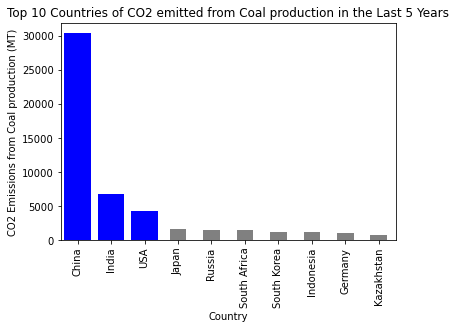

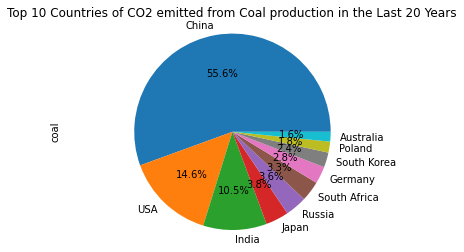

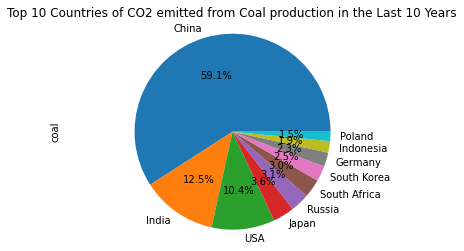

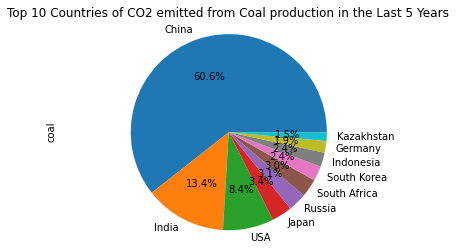

In [36]:
# Filter the data to only include the last 20 years
current_year = pd.Timestamp('now').year
MtCO2_analysis_20_years = MtCO2_analysis[MtCO2_analysis['year'] >= current_year - 20]

# Group by country and sum the coal emissions
coal_emissions_by_country = MtCO2_analysis_20_years.groupby('country')['coal'].sum()

# Get the top 10 countries of coal emissions
top_10_countries_20_years = coal_emissions_by_country.nlargest(10)

# Plot the top 10 countries of coal emissions
ax = top_10_countries_20_years.plot(kind='bar', color='gray')

# Change the color of the first 3 countries to blue
for i in range(3):
    ax.bar(i, top_10_countries_20_years.values[i], color='blue')

plt.xlabel('Country')
plt.ylabel('CO2 Emissions from Coal production (MT)')
plt.title('Top 10 Countries of CO2 emitted from Coal production in the Last 20 Years')
plt.show()

# Filter the data to only include the last 10 years
current_year = pd.Timestamp('now').year
MtCO2_analysis_10_years = MtCO2_analysis[MtCO2_analysis['year'] >= current_year - 10]

# Group by country and sum the coal emissions
coal_emissions_by_country = MtCO2_analysis_10_years.groupby('country')['coal'].sum()

# Get the top 10 countries of coal emissions
top_10_countries_10_years = coal_emissions_by_country.nlargest(10)

# Plot the top 10 countries of coal emissions
ax = top_10_countries_10_years.plot(kind='bar', color='gray')

# Change the color of the first 3 countries to blue
for i in range(3):
    ax.bar(i, top_10_countries_10_years.values[i], color='blue')

plt.xlabel('Country')
plt.ylabel('CO2 Emissions from Coal production (MT)')
plt.title('Top 10 Countries of CO2 emitted from Coal production in the Last 10 Years')
plt.show()

# Filter the data to only include the last 5 years
current_year = pd.Timestamp('now').year
MtCO2_analysis_5_years = MtCO2_analysis[MtCO2_analysis['year'] >= current_year - 5]

# Group by country and sum the coal emissions
coal_emissions_by_country = MtCO2_analysis_5_years.groupby('country')['coal'].sum()

# Get the top 10 countries of coal emissions
top_10_countries_5_years = coal_emissions_by_country.nlargest(10)

# Plot the top 10 countries of coal emissions
ax = top_10_countries_5_years.plot(kind='bar', color='gray')

# Change the color of the first 3 countries to blue
for i in range(3):
    ax.bar(i, top_10_countries_5_years.values[i], color='blue')

plt.xlabel('Country')
plt.ylabel('CO2 Emissions from Coal production (MT)')
plt.title('Top 10 Countries of CO2 emitted from Coal production in the Last 5 Years')
plt.show()

# Plot the top 10 countries of coal emissions as a pie chart - 20 years
top_10_countries_20_years.plot(kind='pie', autopct='%1.1f%%')

plt.axis('equal')
plt.title('Top 10 Countries of CO2 emitted from Coal production in the Last 20 Years')
plt.show()

# Plot the top 10 countries of coal emissions as a pie chart - 10 years
top_10_countries_10_years.plot(kind='pie', autopct='%1.1f%%')

plt.axis('equal')
plt.title('Top 10 Countries of CO2 emitted from Coal production in the Last 10 Years')
plt.show()

# Plot the top 10 countries of coal emissions as a pie chart- 5 years
top_10_countries_5_years.plot(kind='pie', autopct='%1.1f%%')

plt.axis('equal')
plt.title('Top 10 Countries of CO2 emitted from Coal production in the Last 5 Years')
plt.show()

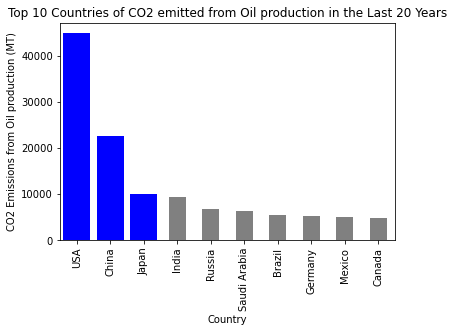

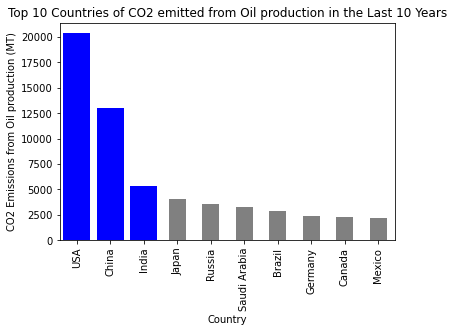

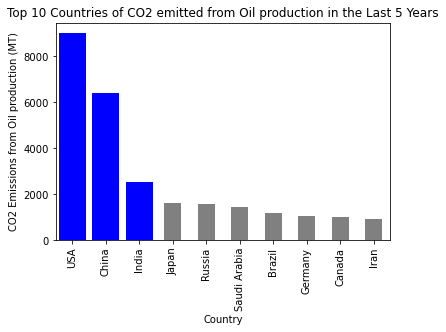

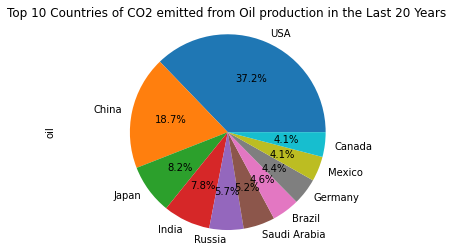

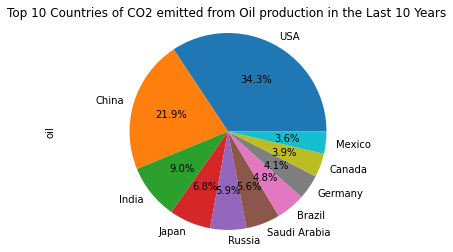

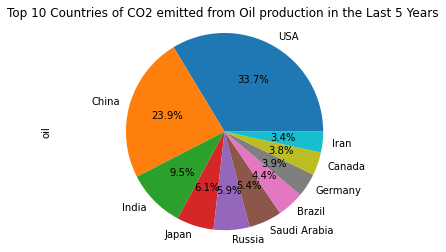

In [37]:
# Filter the data to only include the last 20 years
current_year = pd.Timestamp('now').year
MtCO2_analysis_20_years = MtCO2_analysis[MtCO2_analysis['year'] >= current_year - 20]

# Group by country and sum the oil emissions
oil_emissions_by_country = MtCO2_analysis_20_years.groupby('country')['oil'].sum()

# Get the top 10 countries of oil emissions
top_10_countries_20_years = oil_emissions_by_country.nlargest(10)

# Plot the top 10 countries of oil emissions
ax = top_10_countries_20_years.plot(kind='bar', color='gray')

# Change the color of the first 3 countries to blue
for i in range(3):
    ax.bar(i, top_10_countries_20_years.values[i], color='blue')

plt.xlabel('Country')
plt.ylabel('CO2 Emissions from Oil production (MT)')
plt.title('Top 10 Countries of CO2 emitted from Oil production in the Last 20 Years')
plt.show()

# Filter the data to only include the last 10 years
current_year = pd.Timestamp('now').year
MtCO2_analysis_10_years = MtCO2_analysis[MtCO2_analysis['year'] >= current_year - 10]

# Group by country and sum the oil emissions
oil_emissions_by_country = MtCO2_analysis_10_years.groupby('country')['oil'].sum()

# Get the top 10 countries of oil emissions
top_10_countries_10_years = oil_emissions_by_country.nlargest(10)

# Plot the top 10 countries of oil emissions
ax = top_10_countries_10_years.plot(kind='bar', color='gray')

# Change the color of the first 3 countries to blue
for i in range(3):
    ax.bar(i, top_10_countries_10_years.values[i], color='blue')

    
    
plt.xlabel('Country')
plt.ylabel('CO2 Emissions from Oil production (MT)')
plt.title('Top 10 Countries of CO2 emitted from Oil production in the Last 10 Years')
plt.show()

# Filter the data to only include the last 5 years
current_year = pd.Timestamp('now').year
MtCO2_analysis_5_years = MtCO2_analysis[MtCO2_analysis['year'] >= current_year - 5]

# Group by country and sum the oil emissions
oil_emissions_by_country = MtCO2_analysis_5_years.groupby('country')['oil'].sum()

# Get the top 10 countries of oil emissions
top_10_countries_5_years = oil_emissions_by_country.nlargest(10)

# Plot the top 10 countries of oil emissions
ax = top_10_countries_5_years.plot(kind='bar', color='gray')

# Change the color of the first 3 countries to blue
for i in range(3):
    ax.bar(i, top_10_countries_5_years.values[i], color='blue')

plt.xlabel('Country')
plt.ylabel('CO2 Emissions from Oil production (MT)')
plt.title('Top 10 Countries of CO2 emitted from Oil production in the Last 5 Years')
plt.show()

# Plot the top 10 countries of oil emissions as a pie chart - 20 years
top_10_countries_20_years.plot(kind='pie', autopct='%1.1f%%')

plt.axis('equal')
plt.title('Top 10 Countries of CO2 emitted from Oil production in the Last 20 Years')
plt.show()

# Plot the top 10 countries of oil emissions as a pie chart - 10 years
top_10_countries_10_years.plot(kind='pie', autopct='%1.1f%%')

plt.axis('equal')
plt.title('Top 10 Countries of CO2 emitted from Oil production in the Last 10 Years')
plt.show()

# Plot the top 10 countries of oil emissions as a pie chart- 5 years
top_10_countries_5_years.plot(kind='pie', autopct='%1.1f%%')

plt.axis('equal')
plt.title('Top 10 Countries of CO2 emitted from Oil production in the Last 5 Years')
plt.show()


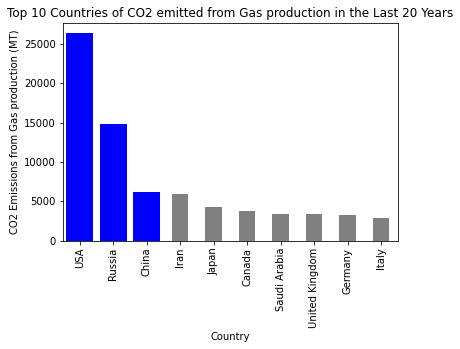

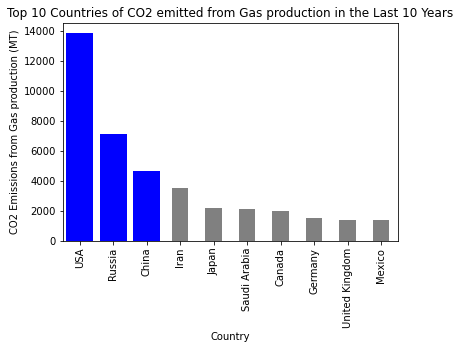

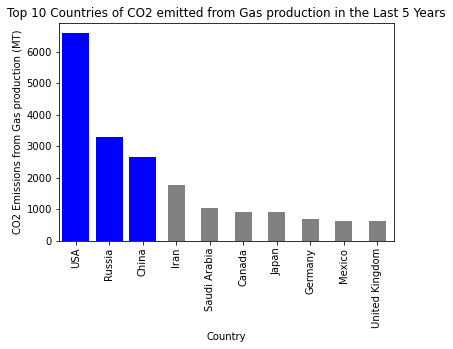

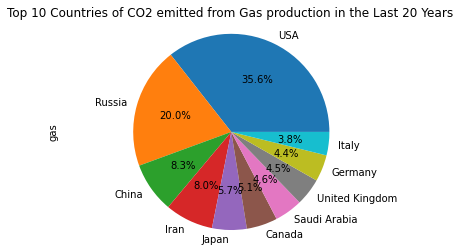

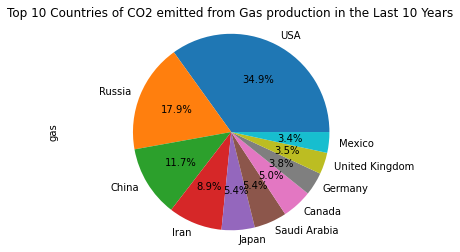

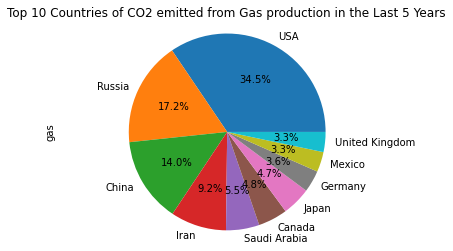

In [38]:
# Filter the data to only include the last 20 years
current_year = pd.Timestamp('now').year
MtCO2_analysis_20_years = MtCO2_analysis[MtCO2_analysis['year'] >= current_year - 20]

# Group by country and sum the gas emissions
gas_emissions_by_country = MtCO2_analysis_20_years.groupby('country')['gas'].sum()

# Get the top 10 countries of gas emissions
top_10_countries_20_years = gas_emissions_by_country.nlargest(10)

# Plot the top 10 countries of gas emissions
ax = top_10_countries_20_years.plot(kind='bar', color='gray')

# Change the color of the first 3 countries to blue
for i in range(3):
    ax.bar(i, top_10_countries_20_years.values[i], color='blue')

plt.xlabel('Country')
plt.ylabel('CO2 Emissions from Gas production (MT)')
plt.title('Top 10 Countries of CO2 emitted from Gas production in the Last 20 Years')
plt.show()

# Filter the data to only include the last 10 years
current_year = pd.Timestamp('now').year
MtCO2_analysis_10_years = MtCO2_analysis[MtCO2_analysis['year'] >= current_year - 10]

# Group by country and sum the gas emissions
gas_emissions_by_country = MtCO2_analysis_10_years.groupby('country')['gas'].sum()

# Get the top 10 countries of gas emissions
top_10_countries_10_years = gas_emissions_by_country.nlargest(10)

# Plot the top 10 countries of gas emissions
ax = top_10_countries_10_years.plot(kind='bar', color='gray')

# Change the color of the first 3 countries to blue
for i in range(3):
    ax.bar(i, top_10_countries_10_years.values[i], color='blue')

plt.xlabel('Country')
plt.ylabel('CO2 Emissions from Gas production (MT)')
plt.title('Top 10 Countries of CO2 emitted from Gas production in the Last 10 Years')
plt.show()

# Filter the data to only include the last 5 years
current_year = pd.Timestamp('now').year
MtCO2_analysis_5_years = MtCO2_analysis[MtCO2_analysis['year'] >= current_year - 5]

# Group by country and sum the gas emissions
gas_emissions_by_country = MtCO2_analysis_5_years.groupby('country')['gas'].sum()

# Get the top 10 countries of gas emissions
top_10_countries_5_years = gas_emissions_by_country.nlargest(10)

# Plot the top 10 countries of gas emissions
ax = top_10_countries_5_years.plot(kind='bar', color='gray')

# Change the color of the first 3 countries to blue
for i in range(3):
    ax.bar(i, top_10_countries_5_years.values[i], color='blue')

plt.xlabel('Country')
plt.ylabel('CO2 Emissions from Gas production (MT)')
plt.title('Top 10 Countries of CO2 emitted from Gas production in the Last 5 Years')
plt.show()

# Plot the top 10 countries of gas emissions as a pie chart - 20 years
top_10_countries_20_years.plot(kind='pie', autopct='%1.1f%%')

plt.axis('equal')
plt.title('Top 10 Countries of CO2 emitted from Gas production in the Last 20 Years')
plt.show()

# Plot the top 10 countries of gas emissions as a pie chart - 10 years
top_10_countries_10_years.plot(kind='pie', autopct='%1.1f%%')

plt.axis('equal')
plt.title('Top 10 Countries of CO2 emitted from Gas production in the Last 10 Years')
plt.show()

# Plot the top 10 countries of gas emissions as a pie chart- 5 years
top_10_countries_5_years.plot(kind='pie', autopct='%1.1f%%')

plt.axis('equal')
plt.title('Top 10 Countries of CO2 emitted from Gas production in the Last 5 Years')
plt.show()


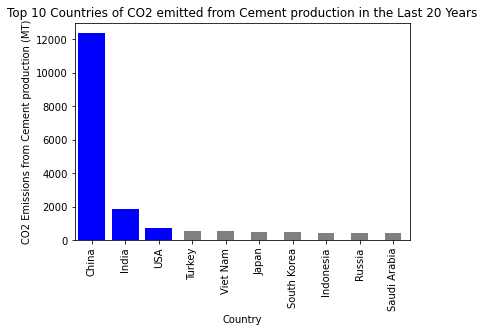

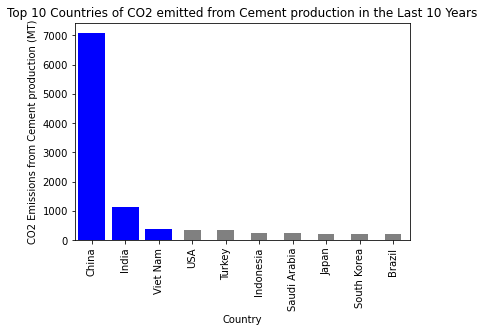

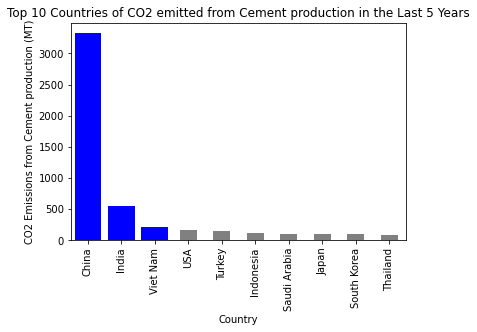

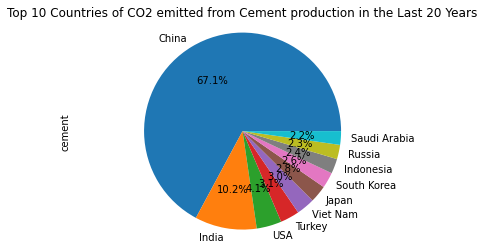

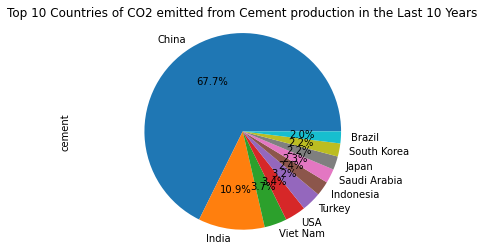

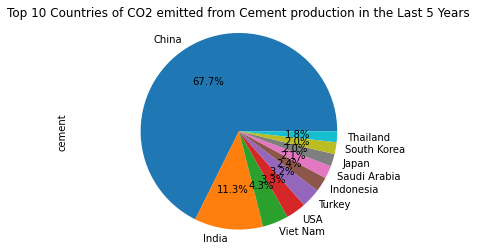

In [40]:
# Filter the data to only include the last 20 years
current_year = pd.Timestamp('now').year
MtCO2_analysis_20_years = MtCO2_analysis[MtCO2_analysis['year'] >= current_year - 20]

# Group by country and sum the cement emissions
cement_emissions_by_country = MtCO2_analysis_20_years.groupby('country')['cement'].sum()

# Get the top 10 countries of cement emissions
top_10_countries_20_years = cement_emissions_by_country.nlargest(10)

# Plot the top 10 countries of cement emissions
ax = top_10_countries_20_years.plot(kind='bar', color='gray')

# Change the color of the first 3 countries to blue
for i in range(3):
    ax.bar(i, top_10_countries_20_years.values[i], color='blue')

plt.xlabel('Country')
plt.ylabel('CO2 Emissions from Cement production (MT)')
plt.title('Top 10 Countries of CO2 emitted from Cement production in the Last 20 Years')
plt.show()

# Filter the data to only include the last 10 years
current_year = pd.Timestamp('now').year
MtCO2_analysis_10_years = MtCO2_analysis[MtCO2_analysis['year'] >= current_year - 10]

# Group by country and sum the cement emissions
cement_emissions_by_country = MtCO2_analysis_10_years.groupby('country')['cement'].sum()

# Get the top 10 countries of cement emissions
top_10_countries_10_years = cement_emissions_by_country.nlargest(10)

# Plot the top 10 countries of cement emissions
ax = top_10_countries_10_years.plot(kind='bar', color='gray')

# Change the color of the first 3 countries to blue
for i in range(3):
    ax.bar(i, top_10_countries_10_years.values[i], color='blue')

plt.xlabel('Country')
plt.ylabel('CO2 Emissions from Cement production (MT)')
plt.title('Top 10 Countries of CO2 emitted from Cement production in the Last 10 Years')
plt.show()

# Filter the data to only include the last 5 years
current_year = pd.Timestamp('now').year
MtCO2_analysis_5_years = MtCO2_analysis[MtCO2_analysis['year'] >= current_year - 5]

# Group by country and sum the cement emissions
cement_emissions_by_country = MtCO2_analysis_5_years.groupby('country')['cement'].sum()

# Get the top 10 countries of cement emissions
top_10_countries_5_years = cement_emissions_by_country.nlargest(10)

# Plot the top 10 countries of cement emissions
ax = top_10_countries_5_years.plot(kind='bar', color='gray')

# Change the color of the first 3 countries to blue
for i in range(3):
    ax.bar(i, top_10_countries_5_years.values[i], color='blue')

plt.xlabel('Country')
plt.ylabel('CO2 Emissions from Cement production (MT)')
plt.title('Top 10 Countries of CO2 emitted from Cement production in the Last 5 Years')
plt.show()

# Plot the top 10 countries of cement emissions as a pie chart - 20 years
top_10_countries_20_years.plot(kind='pie', autopct='%1.1f%%')

plt.axis('equal')
plt.title('Top 10 Countries of CO2 emitted from Cement production in the Last 20 Years')
plt.show()

# Plot the top 10 countries of cement emissions as a pie chart - 10 years
top_10_countries_10_years.plot(kind='pie', autopct='%1.1f%%')

plt.axis('equal')
plt.title('Top 10 Countries of CO2 emitted from Cement production in the Last 10 Years')
plt.show()

# Plot the top 10 countries of cement emissions as a pie chart- 5 years
top_10_countries_5_years.plot(kind='pie', autopct='%1.1f%%')

plt.axis('equal')
plt.title('Top 10 Countries of CO2 emitted from Cement production in the Last 5 Years')
plt.show()


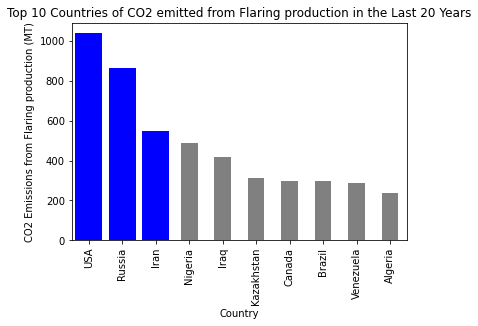

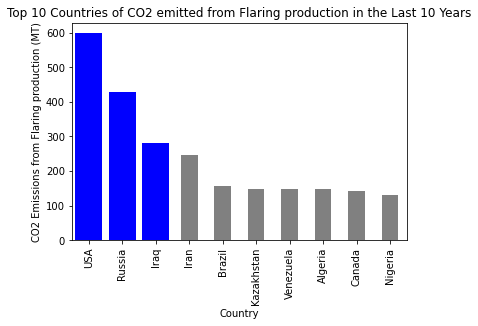

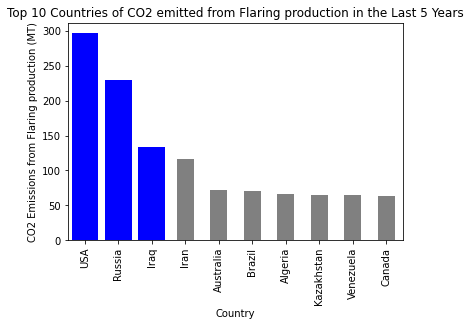

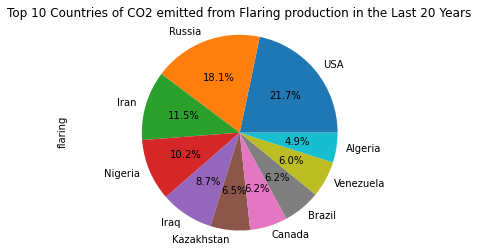

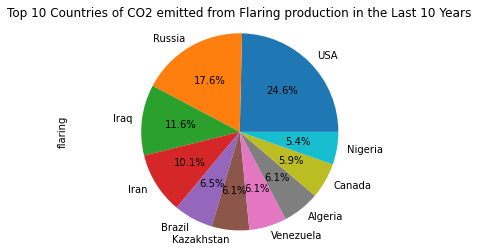

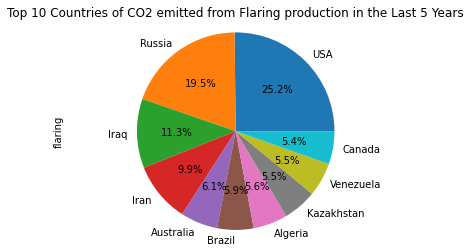

In [41]:
# Filter the data to only include the last 20 years
current_year = pd.Timestamp('now').year
MtCO2_analysis_20_years = MtCO2_analysis[MtCO2_analysis['year'] >= current_year - 20]

# Group by country and sum the flaring emissions
flaring_emissions_by_country = MtCO2_analysis_20_years.groupby('country')['flaring'].sum()

# Get the top 10 countries of flaring emissions
top_10_countries_20_years = flaring_emissions_by_country.nlargest(10)

# Plot the top 10 countries of flaring emissions
ax = top_10_countries_20_years.plot(kind='bar', color='gray')

# Change the color of the first 3 countries to blue
for i in range(3):
    ax.bar(i, top_10_countries_20_years.values[i], color='blue')

plt.xlabel('Country')
plt.ylabel('CO2 Emissions from Flaring production (MT)')
plt.title('Top 10 Countries of CO2 emitted from Flaring production in the Last 20 Years')
plt.show()

# Filter the data to only include the last 10 years
current_year = pd.Timestamp('now').year
MtCO2_analysis_10_years = MtCO2_analysis[MtCO2_analysis['year'] >= current_year - 10]

# Group by country and sum the flaring emissions
flaring_emissions_by_country = MtCO2_analysis_10_years.groupby('country')['flaring'].sum()

# Get the top 10 countries of flaring emissions
top_10_countries_10_years = flaring_emissions_by_country.nlargest(10)

# Plot the top 10 countries of flaring emissions
ax = top_10_countries_10_years.plot(kind='bar', color='gray')

# Change the color of the first 3 countries to blue
for i in range(3):
    ax.bar(i, top_10_countries_10_years.values[i], color='blue')

plt.xlabel('Country')
plt.ylabel('CO2 Emissions from Flaring production (MT)')
plt.title('Top 10 Countries of CO2 emitted from Flaring production in the Last 10 Years')
plt.show()

# Filter the data to only include the last 5 years
current_year = pd.Timestamp('now').year
MtCO2_analysis_5_years = MtCO2_analysis[MtCO2_analysis['year'] >= current_year - 5]

# Group by country and sum the flaring emissions
flaring_emissions_by_country = MtCO2_analysis_5_years.groupby('country')['flaring'].sum()

# Get the top 10 countries of flaring emissions
top_10_countries_5_years = flaring_emissions_by_country.nlargest(10)

# Plot the top 10 countries of flaring emissions
ax = top_10_countries_5_years.plot(kind='bar', color='gray')

# Change the color of the first 3 countries to blue
for i in range(3):
    ax.bar(i, top_10_countries_5_years.values[i], color='blue')

plt.xlabel('Country')
plt.ylabel('CO2 Emissions from Flaring production (MT)')
plt.title('Top 10 Countries of CO2 emitted from Flaring production in the Last 5 Years')
plt.show()

# Plot the top 10 countries of flaring emissions as a pie chart - 20 years
top_10_countries_20_years.plot(kind='pie', autopct='%1.1f%%')

plt.axis('equal')
plt.title('Top 10 Countries of CO2 emitted from Flaring production in the Last 20 Years')
plt.show()

# Plot the top 10 countries of flaring emissions as a pie chart - 10 years
top_10_countries_10_years.plot(kind='pie', autopct='%1.1f%%')

plt.axis('equal')
plt.title('Top 10 Countries of CO2 emitted from Flaring production in the Last 10 Years')
plt.show()

# Plot the top 10 countries of flaring emissions as a pie chart- 5 years
top_10_countries_5_years.plot(kind='pie', autopct='%1.1f%%')

plt.axis('equal')
plt.title('Top 10 Countries of CO2 emitted from Flaring production in the Last 5 Years')
plt.show()


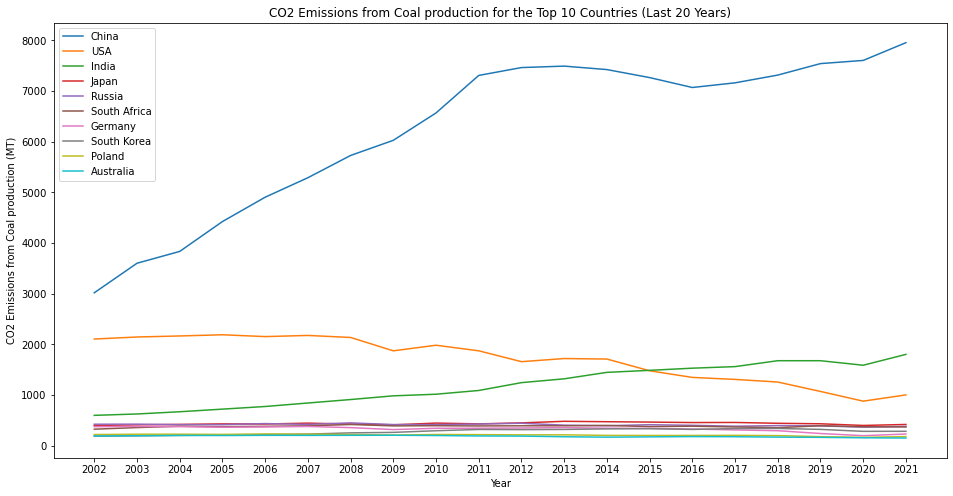

In [31]:
MtCO2_analysis_filtered = MtCO2_analysis[MtCO2_analysis['year'] >= 2002]

# Group the data by year and country, and calculate the total coal emissions for each group
grouped_MtCO2_analysis = MtCO2_analysis_filtered.groupby(['year', 'country'])['coal'].sum().reset_index()

# Get the top 10 countries based on their total coal emissions over the last 20 years
top_10_countries = grouped_MtCO2_analysis.groupby('country')['coal'].sum().sort_values(ascending=False).head(10)

# Filter the data to only include the top 10 countries
MtCO2_analysis_filtered = grouped_MtCO2_analysis[grouped_MtCO2_analysis['country'].isin(top_10_countries.index)]

# Plot the data
plt.figure(figsize=(16, 8))
for country in top_10_countries.index:
    data = MtCO2_analysis_filtered[MtCO2_analysis_filtered['country'] == country]
    plt.plot(data['year'], data['coal'], label=country)

plt.xlabel('Year')
plt.ylabel('CO2 Emissions from Coal production (MT)')
plt.title('CO2 Emissions from Coal production for the Top 10 Countries (Last 20 Years)')
plt.legend()
plt.xticks(range(2002, 2022))
plt.show()

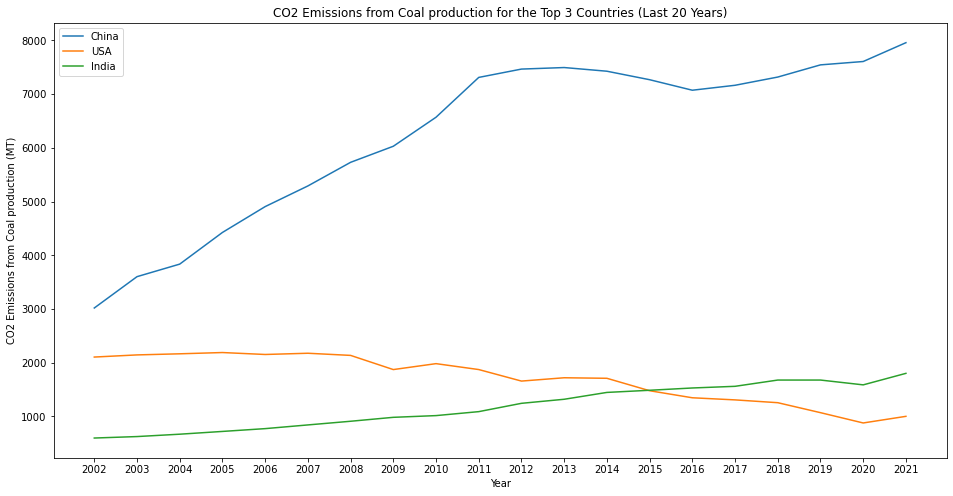

In [32]:
MtCO2_analysis_filtered = MtCO2_analysis[MtCO2_analysis['year'] >= 2002]

# Group the data by year and country, and calculate the total coal emissions for each group
grouped_MtCO2_analysis = MtCO2_analysis_filtered.groupby(['year', 'country'])['coal'].sum().reset_index()

# Get the top 3 countries based on their total coal emissions over the last 20 years
top_3_countries = grouped_MtCO2_analysis.groupby('country')['coal'].sum().sort_values(ascending=False).head(3)

# Filter the data to only include the top 10 countries
MtCO2_analysis_filtered = grouped_MtCO2_analysis[grouped_MtCO2_analysis['country'].isin(top_3_countries.index)]

# Plot the data
plt.figure(figsize=(16, 8))
for country in top_3_countries.index:
    data = MtCO2_analysis_filtered[MtCO2_analysis_filtered['country'] == country]
    plt.plot(data['year'], data['coal'], label=country)

plt.xlabel('Year')
plt.ylabel('CO2 Emissions from Coal production (MT)')
plt.title('CO2 Emissions from Coal production for the Top 3 Countries (Last 20 Years)')
plt.legend()
plt.xticks(range(2002, 2022))
plt.show()

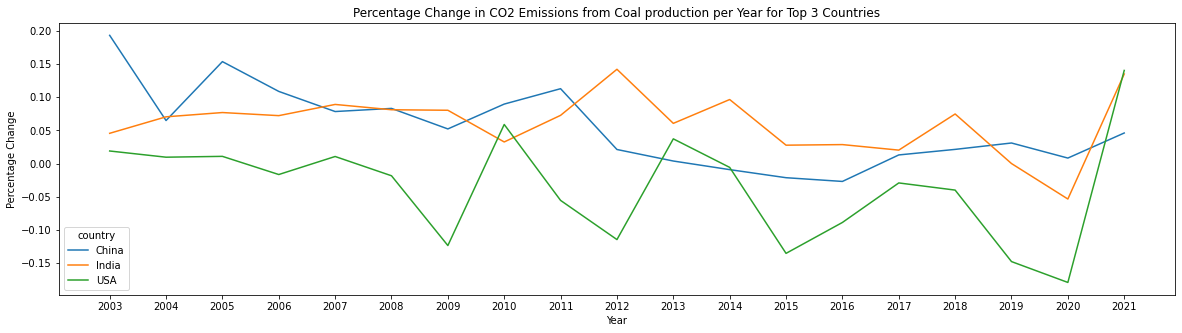

In [30]:


MtCO2_analysis_filtered = MtCO2_analysis[MtCO2_analysis['year'] >= 2002]

# Group the data by year and country, and calculate the total coal emissions for each group
grouped_MtCO2_analysis = MtCO2_analysis_filtered.groupby(['year', 'country'])['coal'].sum().reset_index()

# Get the top 10 countries based on their total coal emissions over the last 20 years
top_3_countries = grouped_MtCO2_analysis.groupby('country')['coal'].sum().sort_values(ascending=False).head(3).reset_index()

top_3_countries = top_3_countries['country'].tolist()

# Filter the data to only include the top 3 emissions countries
MtCO2_analysis_filtered = MtCO2_analysis_filtered[MtCO2_analysis_filtered['country'].isin(top_3_countries)]

# Group the data by country and year
MtCO2_analysis_grouped = MtCO2_analysis_filtered.groupby(['country', 'year']).sum().reset_index()

# Calculate the percentage change of the coal emissions per year
MtCO2_analysis_pct_change = MtCO2_analysis_grouped.pivot(index='year', columns='country', values='coal').pct_change()

# Convert the result to a table
MtCO2_analysis_pct_change_table = pd.DataFrame(MtCO2_analysis_pct_change)

# Plot the percentage change
MtCO2_analysis_pct_change_table.plot(kind='line', figsize=(20, 5))

# Add a title and labels for the x and y axes

plt.title('Percentage Change in CO2 Emissions from Coal production per Year for Top 3 Countries')

plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.xticks(range(2003, 2022))
# Show the plot
plt.show()

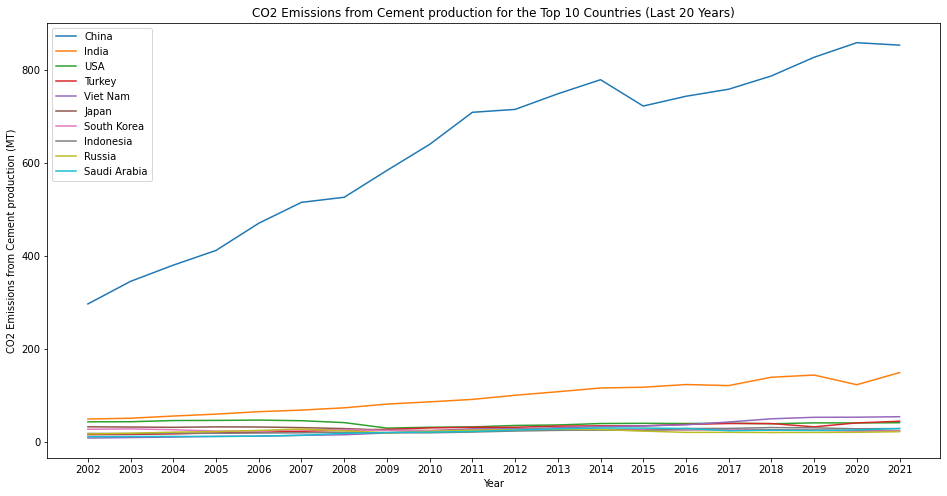

In [29]:
MtCO2_analysis_filtered = MtCO2_analysis[MtCO2_analysis['year'] >= 2002]

# Group the data by year and country, and calculate the total cement emissions for each group
grouped_MtCO2_analysis = MtCO2_analysis_filtered.groupby(['year', 'country'])['cement'].sum().reset_index()

# Get the top 10 countries based on their total cement emissions over the last 20 years
top_10_countries = grouped_MtCO2_analysis.groupby('country')['cement'].sum().sort_values(ascending=False).head(10)

# Filter the data to only include the top 10 countries
MtCO2_analysis_filtered = grouped_MtCO2_analysis[grouped_MtCO2_analysis['country'].isin(top_10_countries.index)]

# Plot the data
plt.figure(figsize=(16, 8))
for country in top_10_countries.index:
    data = MtCO2_analysis_filtered[MtCO2_analysis_filtered['country'] == country]
    plt.plot(data['year'], data['cement'], label=country)

plt.xlabel('Year')
plt.ylabel('CO2 Emissions from Cement production (MT)')
plt.title('CO2 Emissions from Cement production for the Top 10 Countries (Last 20 Years)')
plt.legend()
plt.xticks(range(2002, 2022))
plt.show()

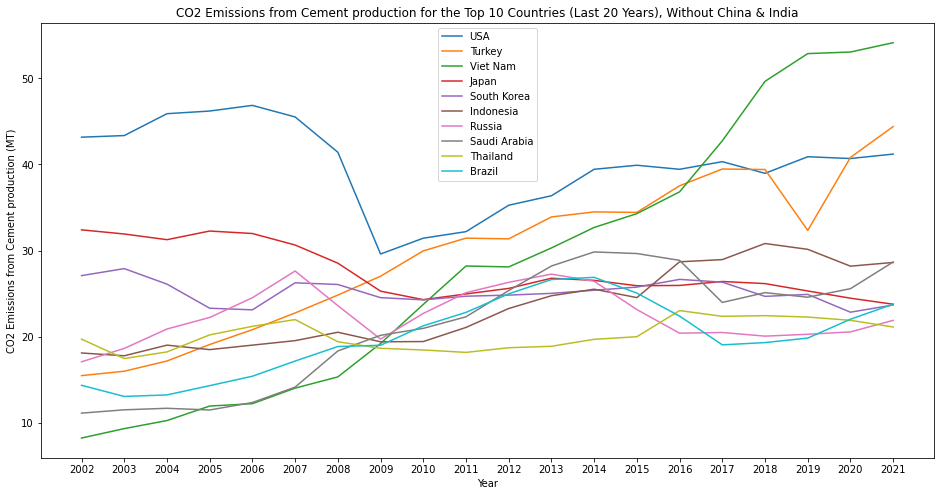

In [42]:
MtCO2_analysis_filtered = MtCO2_analysis[MtCO2_analysis['year'] >= 2002]

#Remove China and India

MtCO2_analysis_filtered = MtCO2_analysis_filtered[MtCO2_analysis_filtered['country'] != 'China']
MtCO2_analysis_filtered = MtCO2_analysis_filtered[MtCO2_analysis_filtered['country'] != 'India']

# Group the data by year and country, and calculate the total cement emissions for each group
grouped_MtCO2_analysis = MtCO2_analysis_filtered.groupby(['year', 'country'])['cement'].sum().reset_index()

# Get the top 10 countries based on their total cement emissions over the last 20 years
top_10_countries = grouped_MtCO2_analysis.groupby('country')['cement'].sum().sort_values(ascending=False).head(10)

# Filter the data to only include the top 10 countries
MtCO2_analysis_filtered = grouped_MtCO2_analysis[grouped_MtCO2_analysis['country'].isin(top_10_countries.index)]

# Plot the data
plt.figure(figsize=(16, 8))
for country in top_10_countries.index:
    data = MtCO2_analysis_filtered[MtCO2_analysis_filtered['country'] == country]
    plt.plot(data['year'], data['cement'], label=country)

plt.xlabel('Year')
plt.ylabel('CO2 Emissions from Cement production (MT)')
plt.title('CO2 Emissions from Cement production for the Top 10 Countries (Last 20 Years), Without China & India')
plt.legend()
plt.xticks(range(2002, 2022))
plt.show()

## Exploring USA

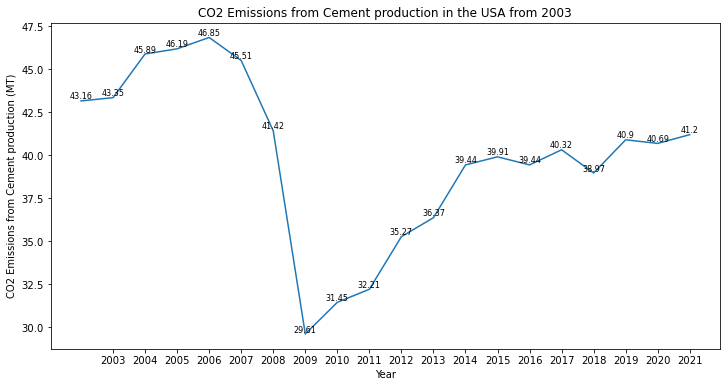

In [43]:
MtCO2_analysis_filtered_usa= MtCO2_analysis_filtered[MtCO2_analysis_filtered['country'] == 'USA']
grouped_df = MtCO2_analysis_filtered_usa.groupby(['year'])['cement'].sum().reset_index()
grouped_df['cement'] = grouped_df['cement'].round(2)
grouped_df = grouped_df.set_index("year")

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(grouped_df["cement"])
plt.xlabel("Year")
plt.ylabel("CO2 Emissions from Cement production (MT)")
plt.title("CO2 Emissions from Cement production in the USA from 2003")
plt.xticks(range(2003, 2022))

# Add data labels to each data point
for i, value in enumerate(grouped_df["cement"]):
    plt.text(grouped_df.index[i], value, str(value), ha='center', va='bottom', fontsize=8)

plt.show()

**You can see a drop in 2008 after the drop of the real-estate bubble**

## Exploring Japan

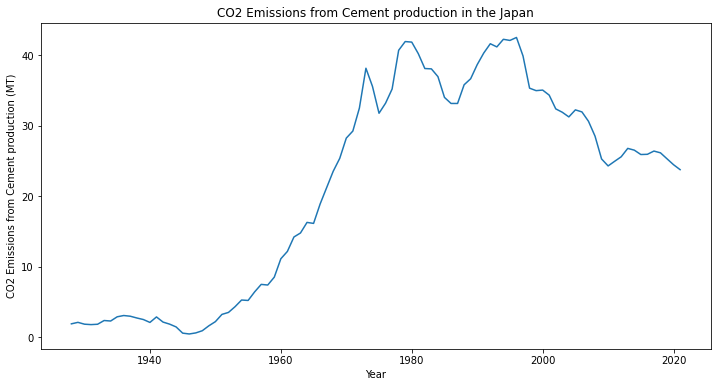

In [46]:
# Filter data for Japan
MtCO2_analysis_filtered_japan = MtCO2_analysis[MtCO2_analysis['country'] == 'Japan']

# Filter for cement data and remove rows with 0 values
MtCO2_analysis_filtered_japan_cement = MtCO2_analysis_filtered_japan[['country', 'year', 'cement']]
MtCO2_analysis_filtered_japan_cement = MtCO2_analysis_filtered_japan_cement[MtCO2_analysis_filtered_japan_cement.cement != 0]  

# Group the data by year and sum the cement emissions
grouped_MtCO2_analysis = MtCO2_analysis_filtered_japan_cement.groupby(['year'])['cement'].sum().reset_index()

# Round the cement emissions to two decimal places and set the index to year
grouped_MtCO2_analysis['cement'] = grouped_MtCO2_analysis['cement'].round(2)
grouped_MtCO2_analysis = grouped_MtCO2_analysis.set_index("year")

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(grouped_MtCO2_analysis["cement"])
plt.xlabel("Year")
plt.ylabel("CO2 Emissions from Cement production (MT)")
plt.title("CO2 Emissions from Cement production in the Japan")

plt.show()


### Zoom in a bit

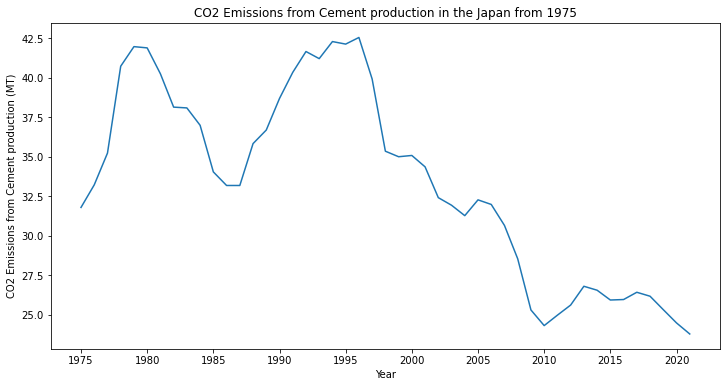

In [47]:
MtCO2_analysis_filtered_japan= MtCO2_analysis[MtCO2_analysis['country'] == 'Japan']
MtCO2_analysis_filtered_japan = MtCO2_analysis_filtered_japan[MtCO2_analysis_filtered_japan['year'] >= 1975]

MtCO2_analysis_filtered_japan_cement = MtCO2_analysis_filtered_japan[['country', 'year', 'cement']]
MtCO2_analysis_filtered_japan_cement = MtCO2_analysis_filtered_japan_cement[MtCO2_analysis_filtered_japan_cement.cement != 0]  
MtCO2_analysis_filtered_japan_cement

grouped_MtCO2_analysis = MtCO2_analysis_filtered_japan_cement.groupby(['year'])['cement'].sum().reset_index()
grouped_MtCO2_analysis['cement'] = grouped_MtCO2_analysis['cement'].round(2)
grouped_MtCO2_analysis = grouped_MtCO2_analysis.set_index("year")

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(grouped_MtCO2_analysis["cement"])
plt.xlabel("Year")
plt.ylabel("CO2 Emissions from Cement production (MT)")
plt.title("CO2 Emissions from Cement production in the Japan from 1975")
plt.xticks(range(1975, 2022,5))
plt.show()


Although building codes are updated regularly, a major change to the building standards act occurred in **1981**. Buildings built to the pre-1981 standard are called “ kyu-taishin ” and buildings built to the new standard are called “ shin-taishin “. This is a very important distinction to many Japanese looking to purchase an apartment.

In the aftermath of the **1995** Kobe earthquake, Japan's building techniques underwent significant changes. The earthquake highlighted the need for stronger, more earthquake-resistant structures, and as a result, the country's building codes were updated and strengthened. Here is a key change that was implemented and effected the cement consumption:
Steel frame construction: Steel frame construction, in which steel beams and columns are used to support the structure, is becoming more popular in Japan. Steel is more flexible than concrete and is less likely to crack or fail during an earthquake.

## Model that will predict the CO2 emissions from Cement production in 2020 for the top 15 countries based on thier emissions from 1970-2019

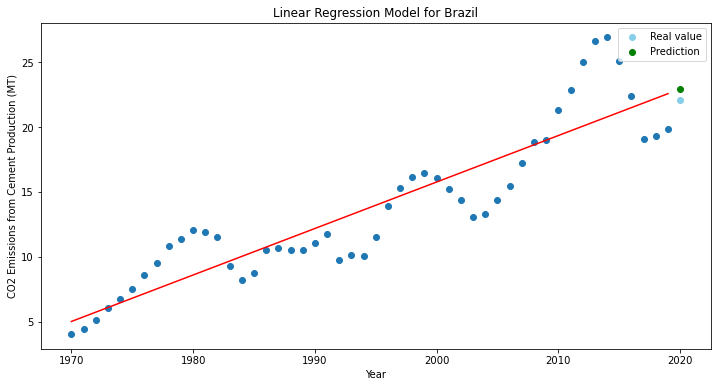

R^2 for Brazil: 0.8115616308146156





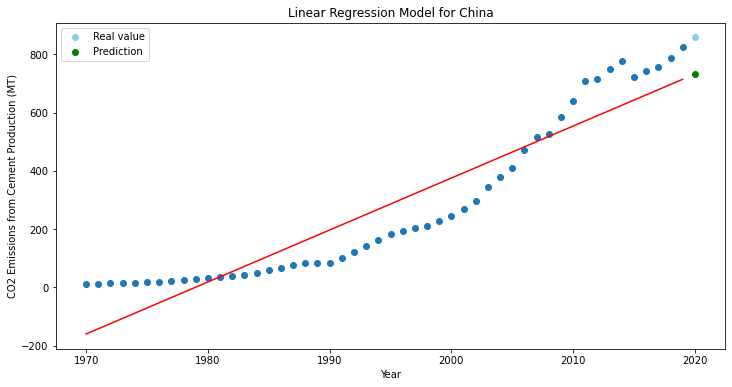

R^2 for China: 0.8775523286637792





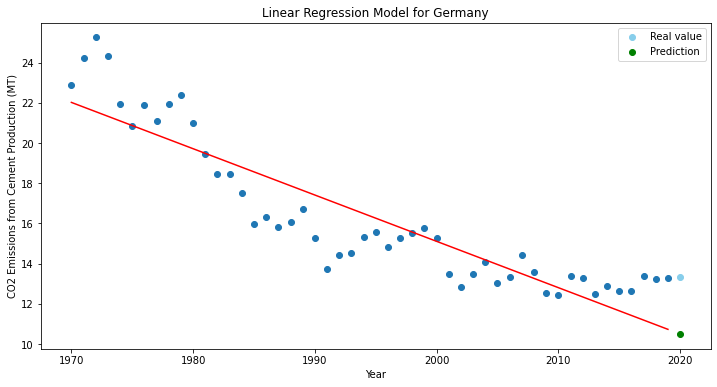

R^2 for Germany: 0.8129930314084788





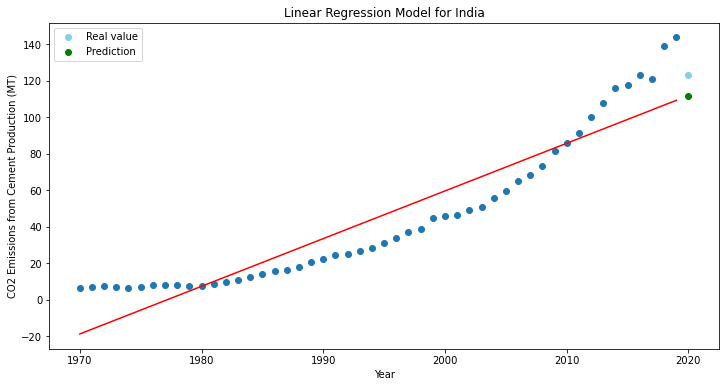

R^2 for India: 0.8702764282131363





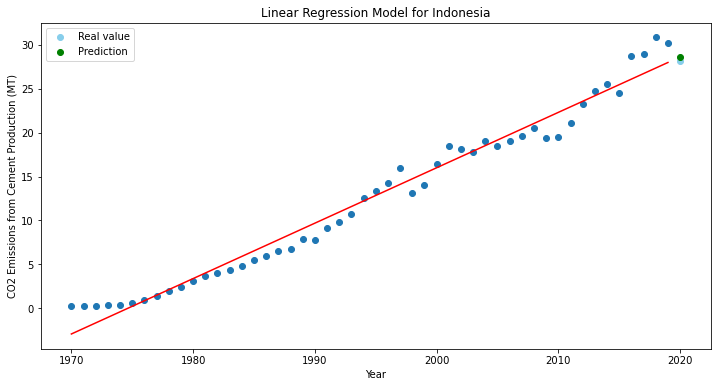

R^2 for Indonesia: 0.9754273568871038





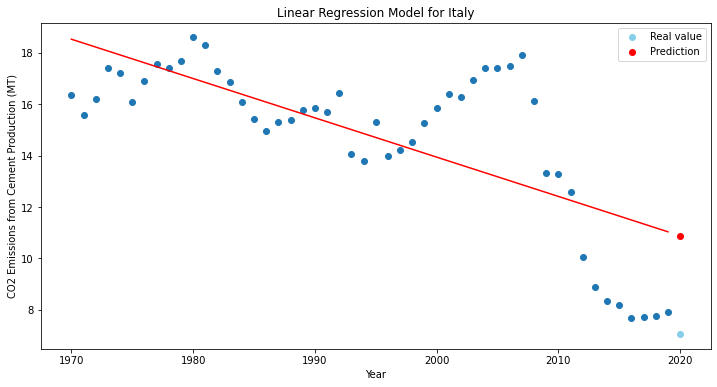

R^2 for Italy: 0.4993132612861737





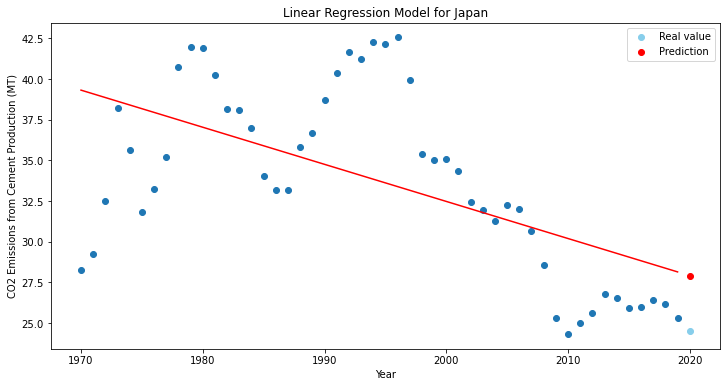

R^2 for Japan: 0.34289225991518235





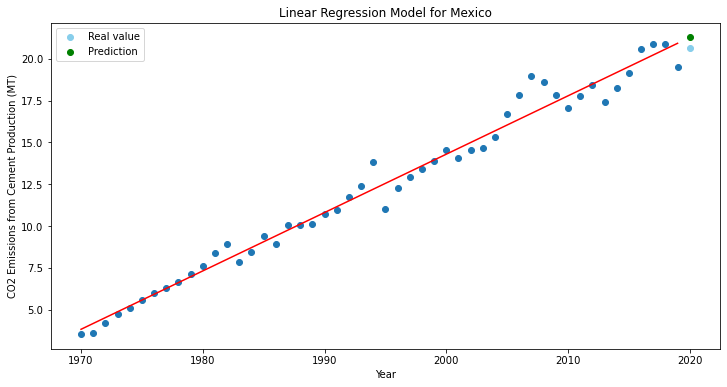

R^2 for Mexico: 0.9793927381721552





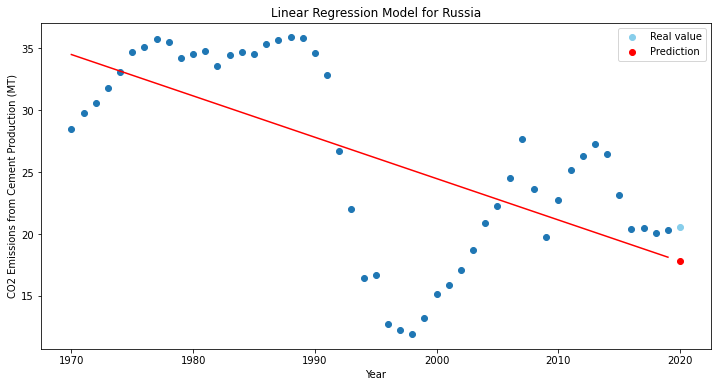

R^2 for Russia: 0.3915087715103821





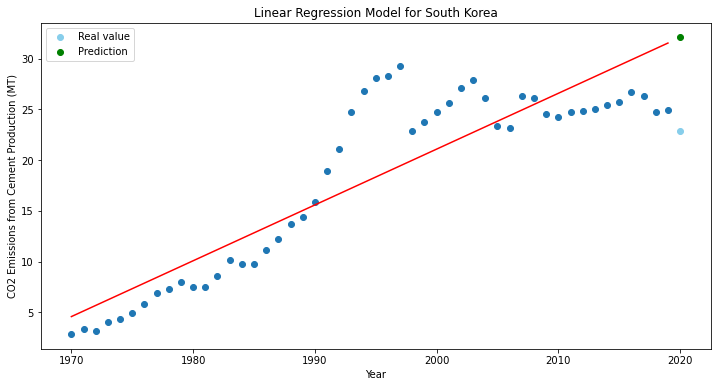

R^2 for South Korea: 0.7944529977578183





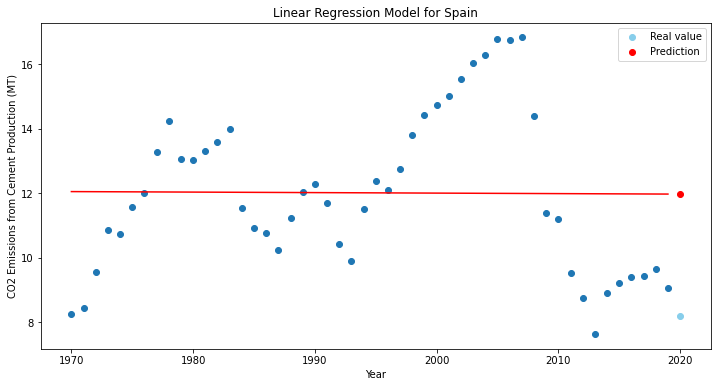

R^2 for Spain: 8.609894244304694e-05





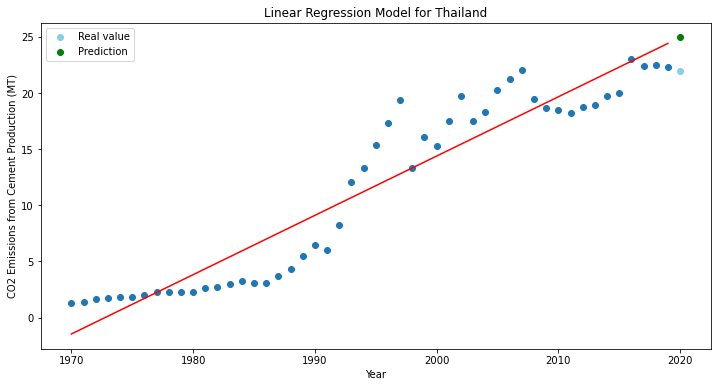

R^2 for Thailand: 0.8977898082367579





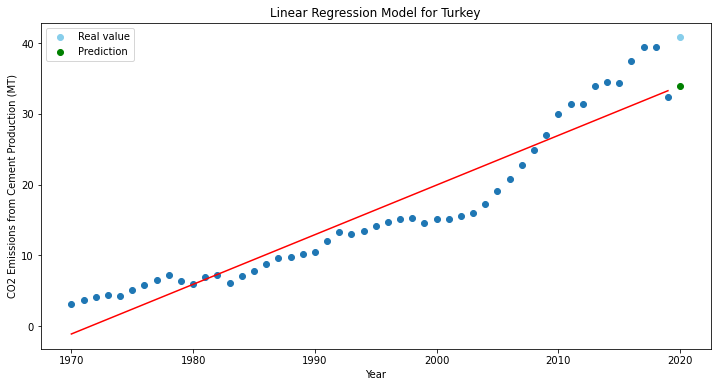

R^2 for Turkey: 0.8926790059679219





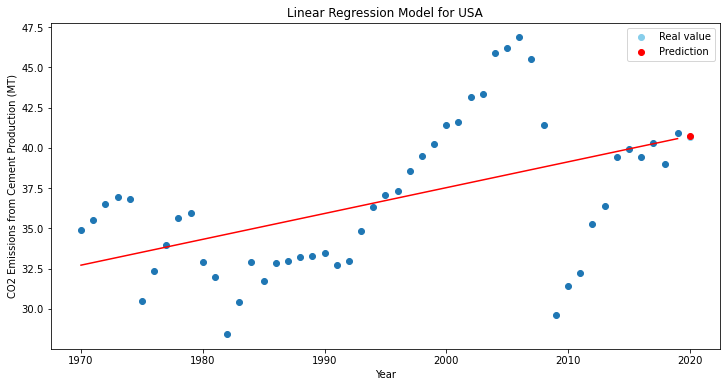

R^2 for USA: 0.25593530638636486





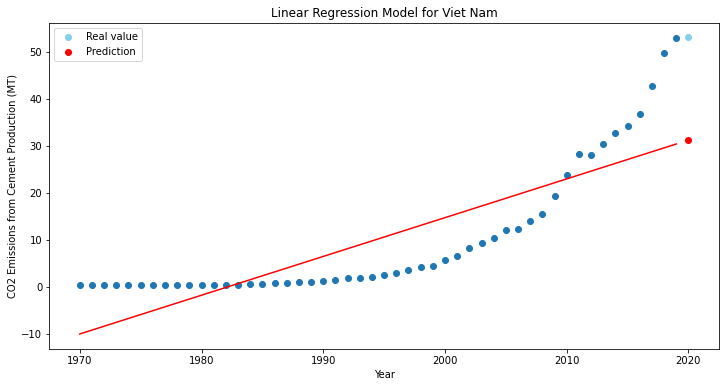

R^2 for Viet Nam: 0.700485982634356



Evaluation of the model, Using predictions and real_values
RMSE: 33.27080723428741
R-squared: 0.9743876774834404


In [49]:
MtCO2_analysis_after_1970 = MtCO2_analysis[MtCO2_analysis['year'] >= 1970]

# Group the data by year and country, and calculate the total cement consumption for each group
grouped_df = MtCO2_analysis_after_1970.groupby(['year', 'country'])['cement'].sum().reset_index()

# Get the top 10 countries based on their total cement consumption over the last 20 years
top_15_countries = grouped_df.groupby('country')['cement'].sum().sort_values(ascending=False).head(15)

# Filter the data to only include the top 10 countries
df_t15_cement = grouped_df[grouped_df['country'].isin(top_15_countries.index)]
df_t15_cement


predictions = []
real_values = []

for country in df_t15_cement['country'].unique():
    # Filter data for each country
    country_df = df_t15_cement[df_t15_cement['country'] == country]
    country_df = country_df[country_df['year'] < 2020]
    
    # Train the model
    X = country_df['year'].values.reshape(-1, 1)
    y = country_df['cement'].values
    model = LinearRegression()
    model.fit(X, y)
    
    # Make prediction for 2020
    X_predict = np.array([2020]).reshape(-1, 1)
    prediction = model.predict(X_predict)
    predictions.append(prediction[0])
    
    # Get the real value for 2020
    real_value = df[(df['country'] == country) & (df['year'] == 2020)]['cement'].values[0]
    real_values.append(real_value)
    
    # Plot the data
    plt.figure(figsize=(12,6))
    plt.scatter(X, y)
    plt.plot(X, model.predict(X), color='red')
    
    
    plt.scatter(2020, real_value, color='skyblue', label='Real value')    
    r2 = model.score(X, y)
    if r2 > 0.75:

        plt.scatter(2020, prediction, color='green', label='Prediction')
    else:
        plt.scatter(2020, prediction, color='red', label='Prediction')
        
        
#    plt.scatter(2020, real_value, color='green', label='Real value')
#    plt.scatter(2020, prediction, color='red', label='prediction')
    plt.xlabel('Year')
    plt.ylabel('CO2 Emissions from Cement Production (MT)')
    plt.title(f'Linear Regression Model for {country}')
    plt.legend()
    plt.show()
    
    r2 = model.score(X, y)
    print(f'R^2 for {country}: {r2}\n\n\n')
    
# Calculate accuracy
predictions = np.array(predictions)
real_values = np.array(real_values)
mse = mean_squared_error(real_values, predictions)
rmse = np.sqrt(mse)
print(f'Evaluation of the model, Using predictions and real_values')
print(f'RMSE: {rmse}')
r2 = r2_score(real_values, predictions)
print(f'R-squared: {r2}')